[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/euler_method.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A script that illustrates Euler's method
# Cannot use lambda because it is used in Python to declare an anonymous function
lam = -1
# lam = -1+1j # a complex number case

# Define time span
t0 = 0
tend = 1

# Set initial condition
y0 = 1

# Define timestep
dt = 0.25

# The number of timesteps (no adaptive timesteps yet)
nt = round((tend-t0)/dt + 1e-308)

In [3]:
# Initialize solution arrays
y = np.zeros(5)
t = np.zeros(5)
y[0] = y0
t[0] = t0

# Euler's method
for i in range(0,nt):
    # Increment time
    t[i+1] = t[i] + dt
    # Euler step
    y[i+1] = y[i] + dt*lam*y[i]

# Compute exact solution for reference
nt_exact = 100
t_exact = np.arange(1,nt_exact+2) * (tend-t0) / nt_exact + t0
y_exact = y0*np.exp(lam*t_exact)

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

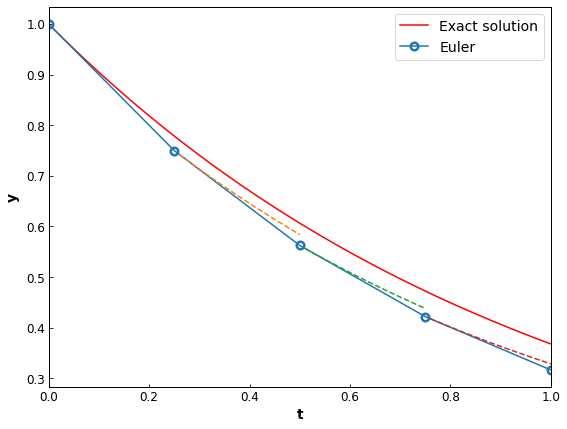

In [5]:
# Plot numerical and analytical solutions
fig, ax = plt.subplots(1,1,figsize=(9,7))

plt.plot(t_exact, y_exact,linewidth=1.5,color='r', label='Exact solution')
plt.plot(t, y, '-o', linewidth=1.5, mfc='none', ms=7.5, mew=2.5, label='Euler')

# Compute the ratio of the timestep used in computing the exact solution and the numerical solution
dtratio = nt_exact / ((tend-t0)/dt)

# Plot exact solutions for each of the sub-intervals in the numerical solution using
# the numerical solution at the beginning of the sub-interval as the initial condition
for i in range(1,nt):
    irange = np.arange((i)*dtratio,(i+1)*dtratio).astype('int')
    plt.plot(t_exact[irange], y_exact[irange]*y[i]/y0/np.exp(lam*t[i]), '--', linewidth=1.5)

# Set axes range
ax.set_xlim(t0,tend)

# Set axes labels
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')
ax.legend(loc='upper right')

plt.show()